<H2>Linear Models for Regression and Classification</H2>

**Agenda**
    1. Simple linear regression using Ordinary Least Squares
    2. Gradient Descent Algorithm
    3. Regularized Regression Methods -Ridge ,Lasso ,ElasticNet
    4. Logistic  Regression for Classification
    5. Online Learning methods -Stochastic Gradient Descent & Passive Aggrasive
    6. Robust Regression -Dealing with outliers and Model errors
    7. Polynomial Regresssion
    8. Bias-Variance Tradeoff


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


<h3> 1. Simple linear regression using Ordinary Least Squares</h3><hr>
<li>YOUTUBE LINK : https://youtu.be/4PHI11lX11I

In [82]:
df=pd.read_csv('C://Users//Judah.Chisare//Desktop//DataSets//data.csv')
x=df.iloc[:,0]
y=df.iloc[:,1]


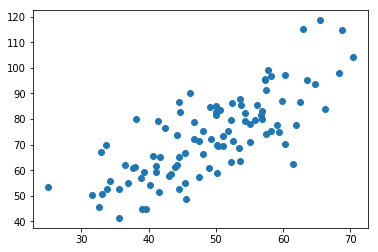

In [83]:
plt.scatter(x,y)
plt.show()

In [84]:
#building the model

x_mean =np.mean(x)
y_mean =np.mean(y)

num=0
den=0

for i in range(len(x)):
    num+=(x[i]-x_mean)*(y[i]-y_mean)
    den+=(x[i]-x_mean)**2
m=num/den
c=y_mean-m*x_mean
print(m,c)


1.287357370010931 9.908606190326509


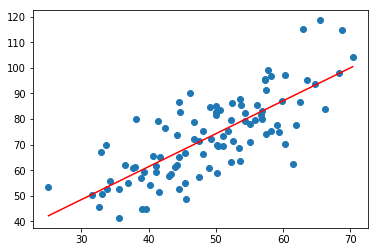

In [85]:
#making predictions
y_pred=m*x+c

plt.scatter(x,y)
plt.plot([min(x),max(x)],[min(y_pred),max(y_pred)],color='red')

plt.show()

<h3> 2. MULTIPLE LINEAR REGRESSION

In [90]:
dfd=pd.read_excel('C://Users//Judah.Chisare//Desktop//DataSets//dataset1.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [183]:
dfd.head()

X1  X2    X3   X4   X5
0   8.0  78   284  9.1  109
1   9.3  68   433  8.7  144
2   7.5  70   739  7.2  113
3   8.9  96  1792  8.9   97
4  10.2  74   477  8.3  206

In [184]:

y=dfd.iloc[:,:1].values
x=dfd.iloc[:,1:].values

In [185]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

In [186]:
from sklearn.linear_model import LinearRegression

In [187]:
regressor=LinearRegression()

In [188]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [189]:
y_pred=regressor.predict(x_test)

In [199]:
#Testing the model
regressor.predict([[96,1792,8.9,97]])

array([[10.53396229]])

<h3> -ANOTHER EXAMPLE

In [167]:
dfdict

age  area  bedrooms   price
0   20  2600         3  550000
1   15  3000         4  565000
2   18  3200         0  610000
3   30  3600         3  595000
4    8  4000         5  760000

In [168]:
Y=dfdict.iloc[:,3:]
X=dfdict.iloc[:,:3]

In [169]:
X

age  area  bedrooms
0   20  2600         3
1   15  3000         4
2   18  3200         0
3   30  3600         3
4    8  4000         5

In [170]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.5)

In [171]:
regressor=LinearRegression()

In [172]:
dfdict.dtypes

age         int64
area        int64
bedrooms    int64
price       int64
dtype: object

In [175]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [176]:
regressor.coef_

array([[ 0.449955  , 44.99550045,  0.        ]])

In [177]:
regressor.intercept_

array([433002.69973003])

In [179]:
y_pred=regressor.predict(x_test)
y_pred

array([[567995.95040496],
       [576996.40035996],
       [612988.30116988]])

In [182]:
regressor.predict([[3000,4,15]])

array([[434532.54674533]])

<h2> 3. Gradient Descent </h2>
    <li>linearRegression tries to minimise RSS using Gradient Descent
    <li>The objective of Gradient Descen tis to obtain best weights such that RSS is minimal

<h4> Understanding Math behind gradient descent with simplified notaion</h4><br>

<li>YOUTUBE LINK : https://youtu.be/kR6tBAq16ng


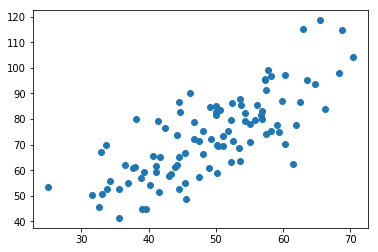

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df0=pd.read_csv('C://Users//Judah.Chisare//Desktop//DataSets//data.csv')
X=df0.iloc[:,0]
Y=df0.iloc[:,1]

plt.scatter(X,Y)

In [56]:
#Building a model

m=0
c=0
L= 0.0001
num=1000
n=len(X)


for i in range(n):
    Y_pred=m*X + c
    Dm=(-2/n)*sum(X*(Y-Y_pred))
    Dc=(-2/n)*sum(Y-Y_pred)
    m = m-L*Dm
    c = c-L*Dc
    
print(m,c)


1.4809284677644328 0.0362353540942316


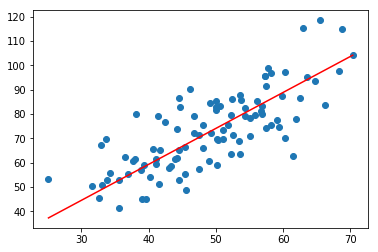

In [57]:
#Making  predictions

Y_pred=m*X + c
plt.scatter(X,Y)
plt.plot([min(X),max(X)],[min(Y_pred),max(Y_pred)],color='red')
plt.show()


In [65]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [66]:
#loading a predefined Boston dataset

boston_dataset=datasets.load_boston()

In [70]:
boston_pd=pd.DataFrame(boston_dataset.data)

In [73]:
boston_pd.columns=boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

#input
X = boston_pd.iloc[:, :-1]

#output
Y = boston_pd.iloc[:, -1]
print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [80]:
x_train, x_test ,y_train ,y_test=train_test_split(
X,Y,
test_size= 0.25
)


In [81]:
print("Train data shape of X = % s and Y = % s :"%(
x_train.shape, y_train.shape))

print("Train data shape of X = % s and Y = % s :"%(
x_test.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (379,) :
Train data shape of X = (127, 13) and Y = (127,) :
